### Multidimensional Analysis of Economic Status on Math Achievement in NYC Schools

By [Hongyuan Zhang]

## Introduction:

This study aims to explore the intersection of economic status, and educational outcomes, specifically focusing on math test scores among students in the five boroughs of New York City from 2013 to 2017. The primary objective is to understand how these factors individually and collectively influence academic performance and to identify patterns or disparities that could inform targeted educational policies and interventions.

## Research Question:

Does economic status affect math test scores among students in New York City, and if so, how have these effects varied across different boroughs and over time?

## Hypothesis:

We hypothesize that there are statistically significant disparities in math test scores based on students' economic status. We anticipate that students from lower economic backgrounds may underperform in comparison to their peers. Additionally, we expect that the magnitude of these disparities has narrowed over the years in most boroughs.





## About the Data:
The  dataset is titled "2013 - 2017 Borough Math Results - Economic." It is maintained by the New York State Department of Education (DOE). It's updated annually and includes the math exam results for students in grades 3-8 by their economic status . The purpose of these datasets is to track and report the performance levels of these students on the New York State (NYS) Math test.(https://data.cityofnewyork.us/Education/Math-Test-Results-2013-2023/74kb-55u9/about_data)

The data is specifically collected by the NY State Education Department and can be used to analyze and understand the performance levels of New York City students in the specified grades on the state math tests over a five-year period, from 2013 to 2017. Keywords associated with this dataset include DOE, education, citywide, math, test, and performance, and it falls under the 'Education' category.



In [101]:
import pandas as pd
import plotly.express as px



In [102]:
math_result=pd.read_csv('/Users/zhanghongyuan/Downloads/2013-2017_Borough_Math_Results_-_Economic_20240207.csv')

math_result


,Borough,Grade,Year,Category,Number Tested,Mean Scale Score,Level1_N,Level1_%,Level2_N,Level2_%,Level3_N,Level3_%,Level4_N,Level4_%,Level3+4_N,Level3+4_%
0,BRONX,3,2013,Econ Disadv,14947,286,6861,45.9,5413,36.2,2013,13.5,660,4.4,2673,17.9
1,BRONX,3,2014,Econ Disadv,15153,289,6326,41.7,5409,35.7,2548,16.8,870,5.7,3418,22.6
2,BRONX,3,2015,Econ Disadv,13516,288,5963,44.1,4579,33.9,2087,15.4,887,6.6,2974,22.0
3,BRONX,3,2016,Econ Disadv,13383,288,5483,41.0,4759,35.6,2081,15.5,1060,7.9,3141,23.5
4,BRONX,3,2017,Econ Disadv,13104,289,5438,41.5,4152,31.7,2294,17.5,1220,9.3,3514,26.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,STATEN ISLAND,All Grades,2013,Not Econ Disadv,10473,316,1659,15.8,3754,35.8,3130,29.9,1930,18.4,5060,48.3
346,STATEN ISLAND,All Grades,2014,Not Econ Disadv,10236,320,1297,12.7,3252,31.8,3270,31.9,2417,23.6,5687,55.6
347,STATEN ISLAND,All Grades,2015,Not Econ Disadv,10671,318,1616,15.1,3449,32.3,3036,28.5,2570,24.1,5606,52.5
348,STATEN ISLAND,All Grades,2016,Not Econ Disadv,10732,320,1597,14.9,3240,30.2,3018,28.1,2877,26.8,5895,54.9


## Data Cleanup

The data collected by by the New York State Department of Education (DOE) is very infromative that it has information about students' economic status by grades. For the simplicity of this study, I will only keep the rows that contain the average math test scores of all students in a burough.


In addition, we will also remove the columns that contains the number and percentage of students within the subgroup who achieved a particular level on the NYS ELA test.


In [103]:
# For math_result_econ data
# Selecting only the required columns
# Data Cleanup - Keep only "All Grades" for borough-level analysis
math_result_filtered = math_result[math_result['Grade'] == 'All Grades'].copy()
columns_to_keep = ['Borough', 'Grade', 'Year', 'Category', 'Number Tested', 'Mean Scale Score']
math_result_clean = math_result_filtered[columns_to_keep]
math_result_clean

,Borough,Grade,Year,Category,Number Tested,Mean Scale Score
30,BRONX,All Grades,2013,Econ Disadv,87109,284
31,BRONX,All Grades,2014,Econ Disadv,83622,287
32,BRONX,All Grades,2015,Econ Disadv,75105,286
33,BRONX,All Grades,2016,Econ Disadv,73696,286
34,BRONX,All Grades,2017,Econ Disadv,72978,286
65,BRONX,All Grades,2013,Not Econ Disadv,6118,295
66,BRONX,All Grades,2014,Not Econ Disadv,5474,300
67,BRONX,All Grades,2015,Not Econ Disadv,13108,296
68,BRONX,All Grades,2016,Not Econ Disadv,13396,297
69,BRONX,All Grades,2017,Not Econ Disadv,13557,295


## DATA TRANSFORMATION 

In [104]:
# . Group by Borough and Year to calculate average scores
borough_year_avg = math_result_clean.groupby(['Borough', 'Year'])['Mean Scale Score'].mean().reset_index()
print("Average Mean Scale Score by Borough and Year:")
print(borough_year_avg.head(10))

Average Mean Scale Score by Borough and Year:
    Borough  Year  Mean Scale Score
0     BRONX  2013             289.5
1     BRONX  2014             293.5
2     BRONX  2015             291.0
3     BRONX  2016             291.5
4     BRONX  2017             290.5
5  BROOKLYN  2013             306.0
6  BROOKLYN  2014             310.0
7  BROOKLYN  2015             307.5
8  BROOKLYN  2016             309.0
9  BROOKLYN  2017             309.5


In [105]:
#  Pivot table to reshape data for better visualization
pivot_table = math_result_clean.pivot_table(
    index='Borough', 
    columns='Year', 
    values='Mean Scale Score', 
    aggfunc='mean'
)
print(pivot_table)

Year            2013   2014   2015   2016   2017
Borough                                         
BRONX          289.5  293.5  291.0  291.5  290.5
BROOKLYN       306.0  310.0  307.5  309.0  309.5
MANHATTAN      309.5  312.5  312.0  312.5  313.5
QUEENS         311.0  315.0  312.5  312.5  312.0
STATEN ISLAND  305.0  308.5  307.5  308.0  308.5


In [106]:
#Calculate achievement gap by borough
# First, separate the two categories
econ_disadv = math_result_clean[math_result_clean['Category'] == 'Econ Disadv']
not_econ_disadv = math_result_clean[math_result_clean['Category'] == 'Not Econ Disadv']

# Merge the two dataframes to calculate gap
merged = pd.merge(
    econ_disadv[['Borough', 'Year', 'Mean Scale Score']],
    not_econ_disadv[['Borough', 'Year', 'Mean Scale Score']],
    on=['Borough', 'Year'],
    suffixes=('_Econ', '_NotEcon')
)


print(merged)

          Borough  Year  Mean Scale Score_Econ  Mean Scale Score_NotEcon
0           BRONX  2013                    284                       295
1           BRONX  2014                    287                       300
2           BRONX  2015                    286                       296
3           BRONX  2016                    286                       297
4           BRONX  2017                    286                       295
5        BROOKLYN  2013                    295                       317
6        BROOKLYN  2014                    299                       321
7        BROOKLYN  2015                    299                       316
8        BROOKLYN  2016                    300                       318
9        BROOKLYN  2017                    300                       319
10      MANHATTAN  2013                    292                       327
11      MANHATTAN  2014                    295                       330
12      MANHATTAN  2015                    295     

In [107]:
# Calculate the achievement gap
merged['Achievement_Gap'] = merged['Mean Scale Score_NotEcon'] - merged['Mean Scale Score_Econ']


print("Achievement Gap Analysis:")
print(merged.head(10))

Achievement Gap Analysis:
    Borough  Year  Mean Scale Score_Econ  Mean Scale Score_NotEcon  \
0     BRONX  2013                    284                       295   
1     BRONX  2014                    287                       300   
2     BRONX  2015                    286                       296   
3     BRONX  2016                    286                       297   
4     BRONX  2017                    286                       295   
5  BROOKLYN  2013                    295                       317   
6  BROOKLYN  2014                    299                       321   
7  BROOKLYN  2015                    299                       316   
8  BROOKLYN  2016                    300                       318   
9  BROOKLYN  2017                    300                       319   

   Achievement_Gap  
0               11  
1               13  
2               10  
3               11  
4                9  
5               22  
6               22  
7               17  
8             

## Data Visualization

For my research question, I asked whether economic status affect math test scores among students in New York City, and if so, how have these effects varied across different boroughs and over time?

To explore this, I use plotly to visualize the trends of mean scale scores from math tests among students in grades 3-8 across the five boroughs of New York City, differentiated by their economic status

The visualization's primary goals are as follows:

1. Trend Analysis: To identify and illustrate how the mean scale scores in math tests have evolved over the specified period. It helps in understanding whether there has been improvement, decline, or stagnation in student performance across different areas and groups.

2. Comparative Insights: By including both boroughs and categories (such as economic status) in the visualization, the code aims to highlight differences and similarities in performance trends. This can reveal disparities in educational outcomes based on geography and socioeconomic factors, offering a visual representation of the achievement gap.

3. Data Interaction: The use of markers and different line styles for each category makes the plot interactive and easier to interpret. Markers indicate specific data points for each year, providing a clear view of year-over-year changes, while different line styles (solid, dashed, etc.) help distinguish between categories.

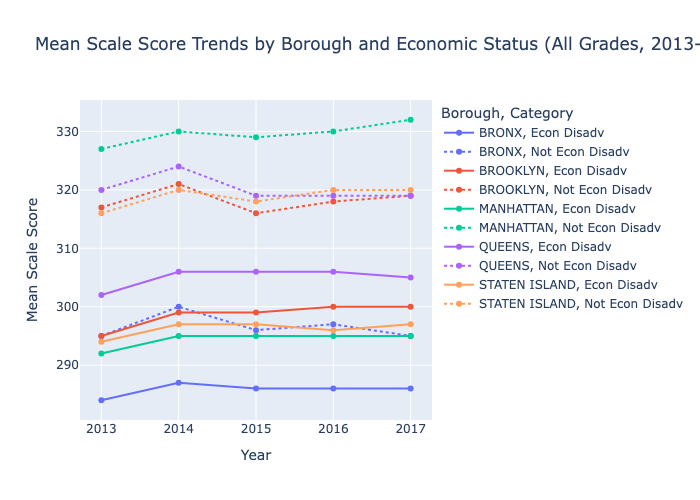

In [108]:
# Visualization 1: the Mean Scale Score trends over the years for each borough and category

fig1 = px.line(
    math_result_clean, 
    x='Year', 
    y='Mean Scale Score',
    color='Borough',
    line_dash='Category',
    markers=True,
    title='Mean Scale Score Trends by Borough and Economic Status (All Grades, 2013-2017)',
    labels={'Mean Scale Score': 'Mean Scale Score', 'Year': 'Year'},
)
fig1.show()


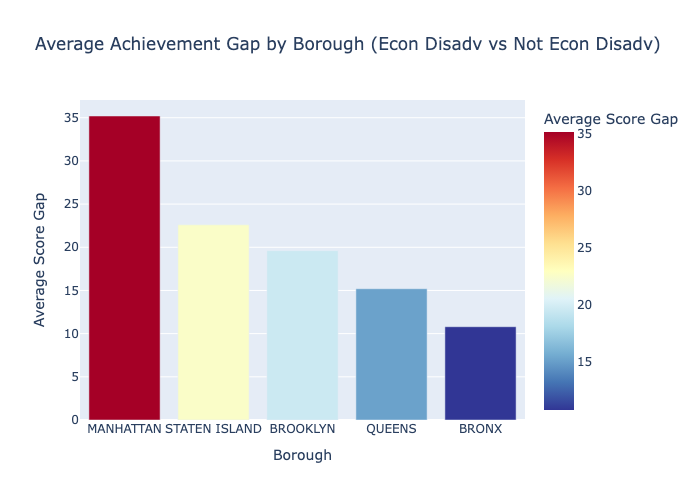

In [109]:

# VISUALIZATION 2: Achievement Gap Bar Chart
gap_summary = merged.groupby('Borough')['Achievement_Gap'].mean().reset_index()
gap_summary = gap_summary.sort_values('Achievement_Gap', ascending=False)

fig2 = px.bar(
    gap_summary,
    x='Borough',
    y='Achievement_Gap',
    color='Achievement_Gap',
    color_continuous_scale='RdYlBu_r',
    title='Average Achievement Gap by Borough (Econ Disadv vs Not Econ Disadv)',
    labels={'Achievement_Gap': 'Average Score Gap', 'Borough': 'Borough'}

)

fig2.show()

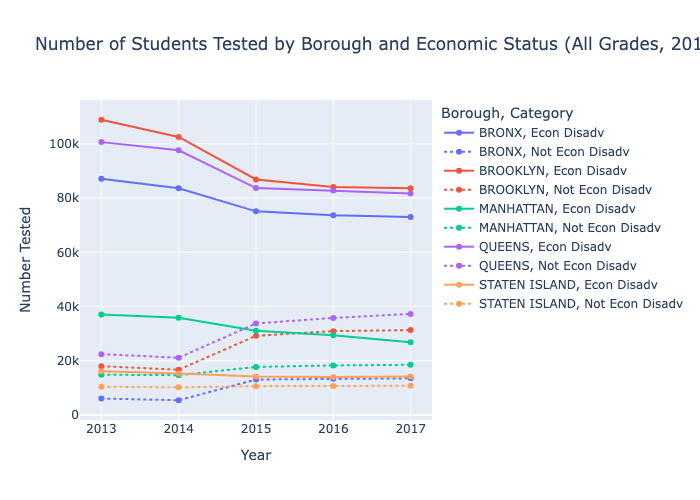

In [110]:
# Visualization 3: the number of students over the years for each borough and category

fig3 = px.line(
    math_result_clean, 
    x='Year', 
    y='Number Tested',
    color='Borough',
    line_dash='Category',
    markers=True,
    title='Number of Students Tested by Borough and Economic Status (All Grades, 2013-2017)',
    labels={'Number Tested': 'Number Tested', 'Year': 'Year'},
)
fig3.show()

## Observation

1. In all boroughs, students who are not economically disadvantaged consistently perform better than those who are economically disadvantaged for each corresponding year and borough.
2. The gap between the two categories seems consistent across the years without any significant convergence or divergence, indicating that the performance gap related to economic status has remained relatively stable over the observed period.

3. For not Econ disadv categories, The borough with the highest mean scale scores  is  Manhattan, while the borough with the lowest scores is the Bronx.
4. For Econ disadv categories, The borough with the highest mean scale scores  is  Queens, while the borough with the lowest scores is the Bronx.

5. All boroughs show a generally flat or slightly positive trend in mean scale scores over time for both categories, suggesting there has been little change or a slight improvement in test scores from 2013 to 2017.

6. Through visualizations, we also observed that the number of economically disadvantaged students being tested is decreasing across all boroughs. This could point to a variety of factors, including changes in the economic composition of the student population, alterations in testing practices, or other demographic shifts.